In [3]:
#What's Cooking ? (Kaggle Competition)

#given :- train.json, test.json files 
#train.json :- id, cuisine, ingredients 
#test.json :- id, ingredients 

#below it is predicted which cuisine in test.json by using Random Forest Classifier
#Bag of words is created 

In [4]:
import pandas as pd

# Reading the data
train_df = pd.read_json('C:/Users/payel/Downloads/train.json')

print(train_df[train_df.cuisine=='indian'])



      cuisine     id                                        ingredients
3      indian  22213                [water, vegetable oil, wheat, salt]
4      indian  13162  [black pepper, shallots, cornflour, cayenne pe...
15     indian  24717  [tumeric, vegetable stock, tomatoes, garam mas...
43     indian  36341  [salmon fillets, shallots, cumin seed, fresh c...
57     indian  38112  [coarse salt, fenugreek, urad dal, potatoes, w...
62     indian  11913  [chicken legs, chile pepper, ghee, tomato past...
71     indian  45839  [burger buns, fresh cilantro, chili powder, ga...
83     indian  14874  [fenugreek leaves, olive oil, garlic, black mu...
84     indian  43399  [black peppercorns, cinnamon sticks, cardamom ...
87     indian  33989  [baby spinach leaves, naan, unsalted butter, c...
97     indian  46905  [olive oil, sea salt, coconut milk, water, gar...
105    indian   8031  [minced garlic, raisins, onions, olive oil, pe...
129    indian   7532  [parsnips, garam masala, chili oil, olive 

In [3]:
train_df.head()


cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

In [4]:
train_df.describe()

id
count  39774.000000
mean   24849.536959
std    14360.035505
min        0.000000
25%    12398.250000
50%    24887.000000
75%    37328.500000
max    49717.000000

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

vect = CountVectorizer(max_features = 1000) #considering only 1000 features
ingredients = train_df['ingredients']
words_list = [' '.join(x) for x in ingredients] #Extract the ingredients and convert them to a *single list* of recipes called words_list
print words_list


[u'romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles', u'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil', u'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers', u'water vegetable oil wheat salt', u'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf', u'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder', u'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage', u'sugar pistachio nuts white almond bark flour vanilla 

In [6]:
#create a bag of words and convert to a array and then print the shape

bag_of_words = vect.fit(words_list)
bag_of_words = vect.transform(words_list).toarray()
print(bag_of_words.shape)

(39774L, 1000L)


In [7]:
forest = RandomForestClassifier(n_estimators = 500) #Initilize a random forest classifier with 500 trees 
#n_estimators is the no. of trees in the forest

forest = forest.fit( bag_of_words, train_df["cuisine"] ) #fit it with the bag of words we created 


In [ ]:
#Random forests or Random decision forests - 
# learning method for classification, regression and other tasks, 
# operate by constructing a multitude of decision trees at training time and 
# outputting the class that is the *mode* of the classes (classification) or mean prediction (regression) of the individual trees. 
# Random decision forests correct for decision trees' habit of overfitting to their training set.

In [8]:
test_data = pd.read_json('C:/Users/payel/Downloads/test.json') #reads the *test* file 
test_data.head()


id                                        ingredients
0  18009  [baking powder, eggs, all-purpose flour, raisi...
1  28583  [sugar, egg yolks, corn starch, cream of tarta...
2  41580  [sausage links, fennel bulb, fronds, olive oil...
3  29752  [meat cuts, file powder, smoked sausage, okra,...
4  35687  [ground black pepper, salt, sausage casings, l...

In [9]:
##same thing done like we did with the training set and create an array

test_ingredients = test_data['ingredients']
test_ingredients_words = [' '.join(x) for x in test_ingredients]
test_ingredients_array = vect.transform(test_ingredients_words).toarray()

In [11]:
# Use the random forest to make cusine predictions
result = forest.predict(test_ingredients_array)
result

array([u'italian', u'southern_us', u'italian', ..., u'italian',
       u'southern_us', u'mexican'], dtype=object)

In [12]:
output = pd.DataFrame( data={"id":test_data["id"], "cuisine":result} ) #Copy the results (in from of arrays) to a pandas dataframe 
                                                                       #with an "id" column and a "cusine" column
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 ) #If you have set a float_format then floats are converted to strings

In [9]:
import collections
bow = [ collections.Counter(recipe) for recipe in train_df.ingredients ]
sumbags = sum(bow, collections.Counter())

C:\Users\payel\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


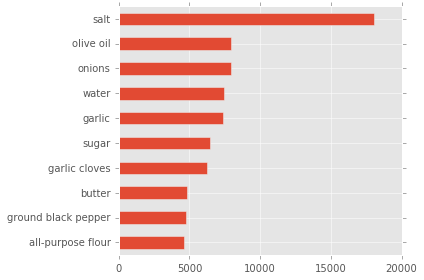

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(u'ggplot')
fig = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:10].plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
#fig.savefig('10_most_used_ingredients.jpg')